In [1]:
# Import required packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import matplotlib.ticker as ticker

In [2]:
# Setting up years for the project
years = range(1923, 2023)
print(list(years))

[1923, 1924, 1925, 1926, 1927, 1928, 1929, 1930, 1931, 1932, 1933, 1934, 1935, 1936, 1937, 1938, 1939, 1940, 1941, 1942, 1943, 1944, 1945, 1946, 1947, 1948, 1949, 1950, 1951, 1952, 1953, 1954, 1955, 1956, 1957, 1958, 1959, 1960, 1961, 1962, 1963, 1964, 1965, 1966, 1967, 1968, 1969, 1970, 1971, 1972, 1973, 1974, 1975, 1976, 1977, 1978, 1979, 1980, 1981, 1982, 1983, 1984, 1985, 1986, 1987, 1988, 1989, 1990, 1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022]


In [3]:
# Create a list to store DataFrame objects
dataFrame = []
# Define column names
cols = ["name", "gender", "births"]
# Iterate through a list of years, and read the data from files into DataFrame
for year in years:
    path = f"yob{year}.txt"
    frame = pd.read_csv(path, names=cols)
    frame['year'] = year
    dataFrame.append(frame)

In [4]:
# Concatenate all DataFrames from the list into one DataFrame
df = pd.concat(dataFrame, ignore_index = True);
# Display DataFrame info : 1883341 entries
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1883342 entries, 0 to 1883341
Data columns (total 4 columns):
 #   Column  Dtype 
---  ------  ----- 
 0   name    object
 1   gender  object
 2   births  int64 
 3   year    int64 
dtypes: int64(2), object(2)
memory usage: 57.5+ MB


In [5]:
# Display DataFrame
df

,name,gender,births,year
0,Mary,F,71635,1923
1,Dorothy,F,39043,1923
2,Helen,F,31486,1923
3,Margaret,F,26135,1923
4,Betty,F,25990,1923
...,...,...,...,...
1883337,Zuberi,M,5,2022
1883338,Zydn,M,5,2022
1883339,Zylon,M,5,2022
1883340,Zymeer,M,5,2022


# Total Births By Years & Gender From 1923 to 2022

In [6]:
# Create a pivot table to calculate total births
total_births = df.pivot_table("births", index = "year", columns = "gender", aggfunc = sum);
total_births

gender,F,M
year,,
1923,1206375,1096119
1924,1248868,1132753
1925,1217389,1115932
1926,1185397,1110499
1927,1192424,1126931
...,...,...
2018,1698373,1813377
2019,1675139,1790682
2020,1612393,1721588


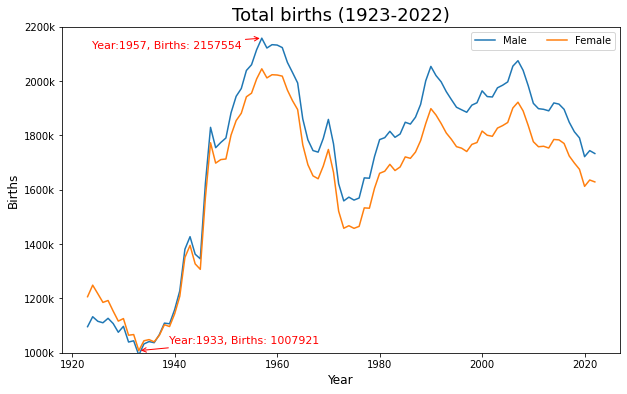

In [7]:
# Generates a line plot to visualize the total births over the years 
plt.figure(figsize=(10,6))
plt.plot(total_births["M"], label="Male")
plt.plot(total_births["F"], label="Female")
plt.title("Total births (1923-2022)", fontsize = 18)
plt.xlabel('Year', fontsize = 12)
plt.ylabel('Births', fontsize = 12)
plt.ylim(1000000, 2200000)

# To display values in thousands (k)
formatter = ticker.FuncFormatter(lambda x, pos: f'{x/1000:.0f}k')
plt.gca().yaxis.set_major_formatter(formatter)

year_of_max_value = total_births["M"].idxmax()
year_of_min_value = total_births["F"].idxmin()
max_value = total_births.at[year_of_max_value, 'M']
min_value = total_births.at[year_of_min_value, 'F']

# To mark the year and birth count of maximum and minimum value
plt.annotate(f'Year:{year_of_max_value}, Births: {max_value}', xy=(year_of_max_value, max_value), xytext=(-170, -10),
             textcoords='offset points', color = 'red', arrowprops=dict(color='red', arrowstyle='->'), fontsize=11)
plt.annotate(f'Year:{year_of_min_value}, Births: {min_value}', xy=(year_of_min_value, min_value), xytext=(30, 7),
             textcoords='offset points', color = 'red', fontsize=11, arrowprops=dict(color='red', arrowstyle='->'))

plt.yticks(fontsize=10)
plt.xticks(fontsize=10)
plt.legend(loc = "upper right", ncols=2)
plt.show()

# Top 10 Boy & Girl Name from 1923 to 2022

In [8]:
# Add a rank column to the DataFrame
count_name = df.groupby(["name", "gender"])['births'].sum().reset_index()
count_name['rank']= count_name['births'].rank(method='average', ascending=False)
count_name.sort_values(by= 'rank', ascending = True)

# Seperate boy & girl names
male_names = count_name[count_name["gender"] == "M"].copy()
female_names = count_name[count_name["gender"] == "F"].copy()

top_10_male_names = male_names.sort_values(by="rank", ascending=True).head(10)
top_10_female_names = female_names.sort_values(by='rank', ascending=True).head(10)

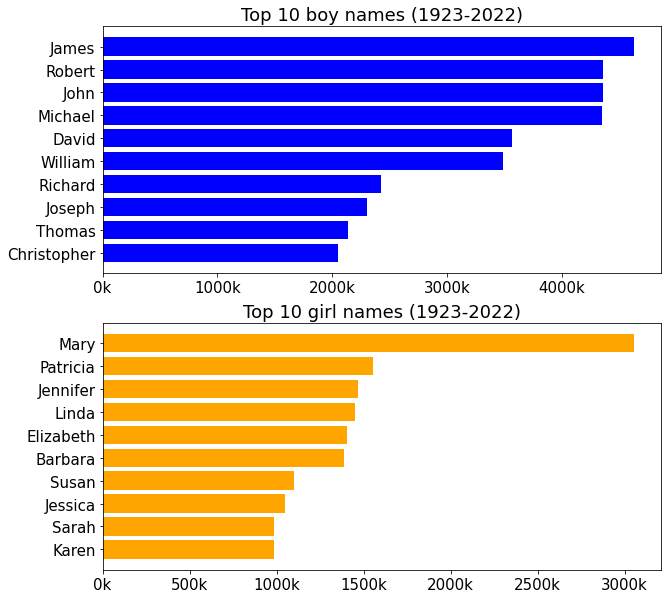

In [9]:
# Create a function that can generate a horizontal bar chart for top names
def plot_ranking(gender_df, title, color):
    plt.barh(gender_df["name"], gender_df["births"], color=color)
    plt.title(title, fontsize=18)
    formatter = ticker.FuncFormatter(lambda x, pos: f'{x/1000:.0f}k')
    plt.gca().xaxis.set_major_formatter(formatter)
    plt.gca().invert_yaxis()
    plt.yticks(fontsize=15)
    plt.xticks(fontsize=15)

plt.figure(figsize=(10, 10))
plt.subplot(2, 1, 1)
plot_ranking(top_10_male_names, "Top 10 boy names (1923-2022)", "blue" )
plt.subplot(2, 1, 2)
plot_ranking(top_10_female_names, "Top 10 girl names (1923-2022)", "orange" )

# Getting Data For the Specified Year and Name

In [10]:
# Add a rank column to boy & girl names list
male_names['m_rank'] = male_names['births'].rank(method='average', ascending=False)
female_names['f_rank'] = female_names['births'].rank(method='average', ascending=False)

In [11]:
# Rank of Name Kevin from 1923 to 2022
Kevin = male_names.loc[male_names['name'] == 'Kevin']
Kevin

,name,gender,births,rank,m_rank
56658,Kevin,M,1178801,28.0,22.0


In [12]:
# create a function to add rank and seperate male & female names for a specific year
def process_and_rank_names(df, year):
    df_year = df[df['year'] == year].copy()
    count_name_year = df_year.groupby(["name", "gender"])['births'].sum().reset_index()
    count_name_year['rank'] = count_name_year['births'].rank(method='min', ascending=False)
    male_names_year = count_name_year[count_name_year["gender"] == "M"].copy()
    female_names_year = count_name_year[count_name_year["gender"] == "F"].copy()
    male_names_year['m_rank'] = male_names_year['births'].rank(method='min', ascending=False)
    female_names_year['f_rank'] = female_names_year['births'].rank(method='min', ascending=False)
    return male_names_year, female_names_year

# create a function to generate a horizontal bar chart for top names from a specfic year 
def process_and_plot_names(df, year, title):
    male_names, female_names = process_and_rank_names(df, year)
    plt.figure(figsize=(10, 10))
    plt.subplot(2, 1, 1)
    plot_ranking(male_names.sort_values(by="rank", ascending=True).head(10), f"Top 10 boy names ({year})","blue")
    plt.subplot(2, 1, 2)
    plot_ranking(female_names.sort_values(by='rank', ascending=True).head(10), f"Top 10 girl names ({year})", "orange")

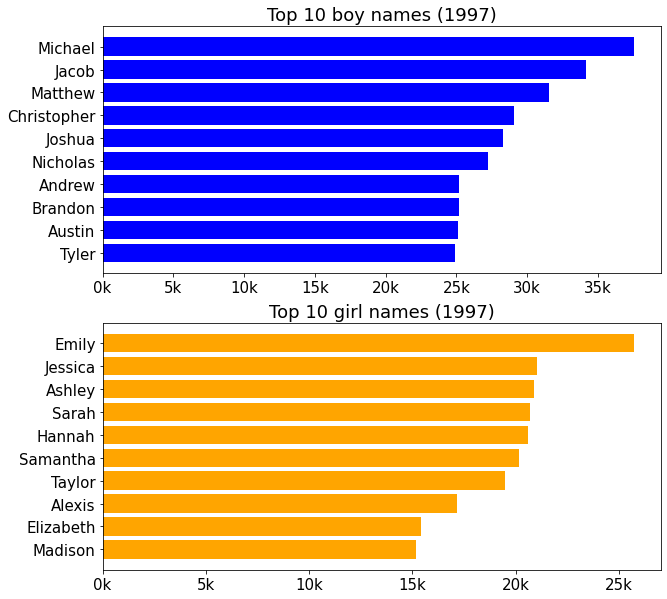

In [13]:
process_and_plot_names(df, 1997, "1997")

In [14]:
# create a function to retrieve data for the specified year and name
def get_name_data(df, name, year):
    male_names_year, female_names_year = process_and_rank_names(df, year)
    
    target_name_male = male_names_year[male_names_year['name'] == name]
    target_name_female = female_names_year[female_names_year['name'] == name]
    
    max_rank = male_names_year['rank'].max()
    max_m_rank = male_names_year['m_rank'].max()
    max_f_rank = female_names_year['f_rank'].max()

    print(target_name_male.to_string(index=False))
    print('Total rank:', max_rank, 'Total m_rank:', max_m_rank)
    print('='*50)
    print(target_name_female.to_string(index=False))
    print('Total rank:', max_rank, 'Total f_rank:', max_f_rank)

In [15]:
# enter year & name to get the data

target_name = "Kevin"
target_year = 1997

get_name_data(df, target_name, target_year)

 name gender  births  rank  m_rank
Kevin      M   13293  41.0    28.0
Total rank: 22985.0 Total m_rank: 9264.0
 name gender  births   rank  f_rank
Kevin      F      33 5896.0  3448.0
Total rank: 22985.0 Total f_rank: 13722.0


# Baby Name Trends Post-1990s

In [16]:
# Create a function to retrieve data for a specificed name, and generate a line chart
def plot_name_births_over_years(df, name):
    df_after_1990 = df[df['year'] >= 1990].copy()
    name_data = df_after_1990[df_after_1990['name'] == name]
    name_group = name_data.groupby(['name', 'year'])['births'].sum().reset_index()
    years = name_group['year']
    births = name_group['births']
    plt.figure(figsize=(10, 6))
    plt.plot(years, births, marker='o', linestyle='-', color='purple')
    plt.title(f"Popularity for the name {name} (After 1990)", fontsize = 18)
    plt.xlabel("Year", fontsize = 12)
    plt.ylabel("Births", fontsize = 12)
    plt.yticks(fontsize=15)
    plt.xticks(fontsize=15)
    plt.grid(True)
    formatter = ticker.FuncFormatter(lambda x, pos: f'{x/1000:.0f}k')
    plt.gca().yaxis.set_major_formatter(formatter)

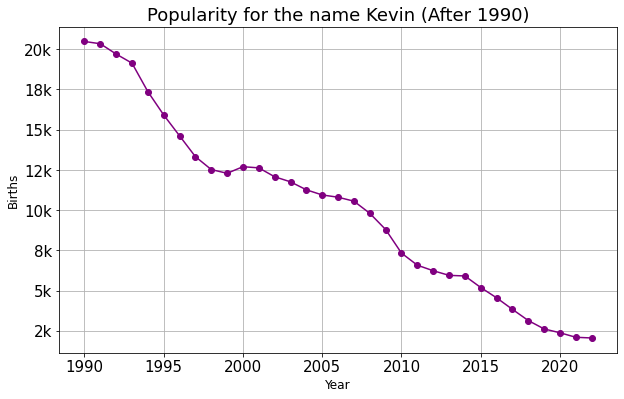

In [17]:
plot_name_births_over_years(df, "Kevin")

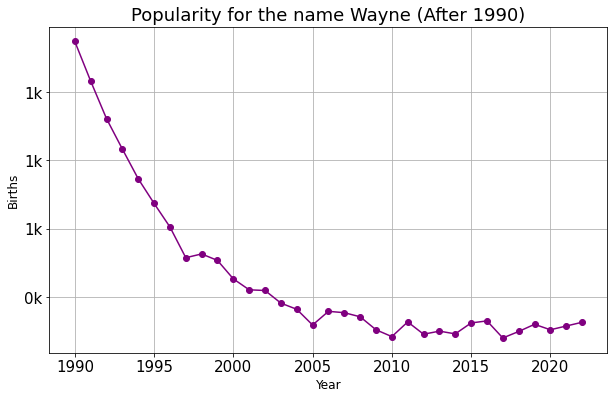

In [18]:
plot_name_births_over_years(df, "Wayne")

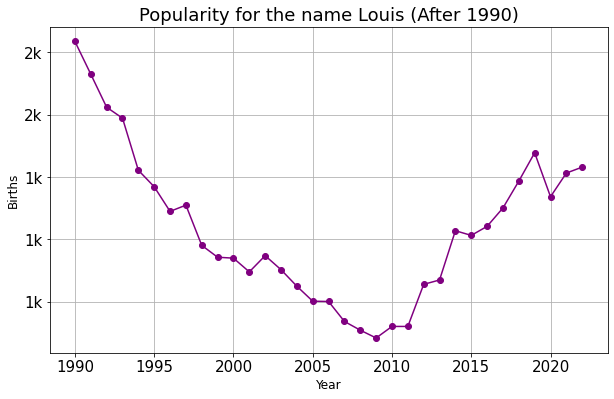

In [19]:
plot_name_births_over_years(df, "Louis")

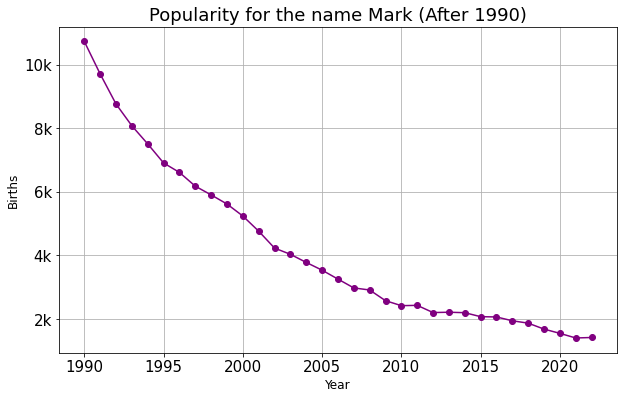

In [20]:
plot_name_births_over_years(df, "Mark")

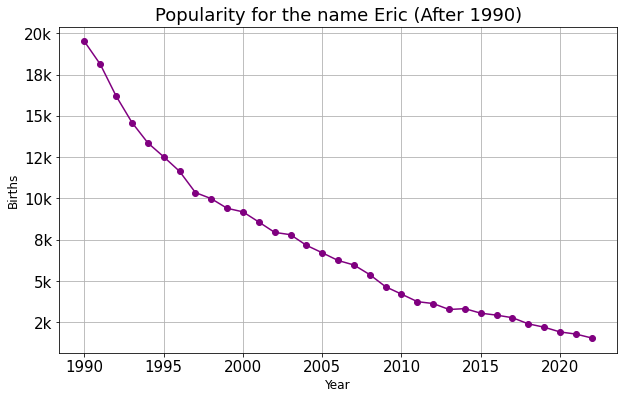

In [21]:
plot_name_births_over_years(df, "Eric")

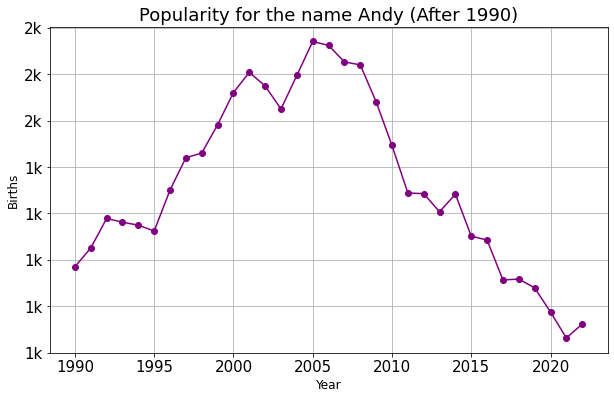

In [22]:
plot_name_births_over_years(df, "Andy")

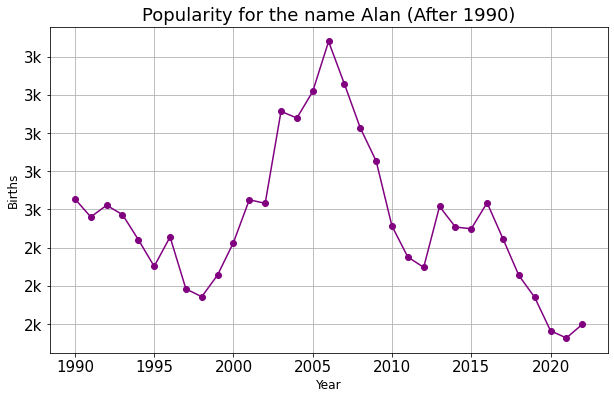

In [23]:
plot_name_births_over_years(df, "Alan")

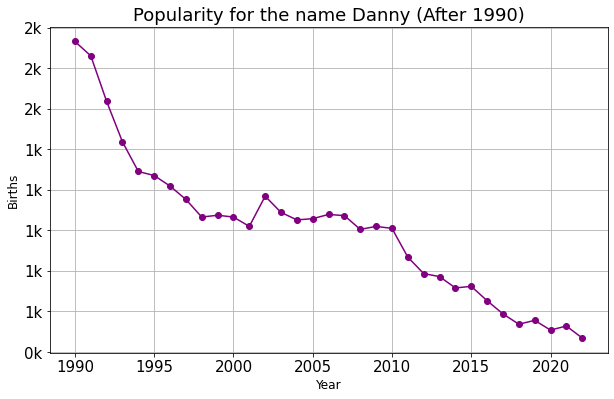

In [24]:
plot_name_births_over_years(df, "Danny")

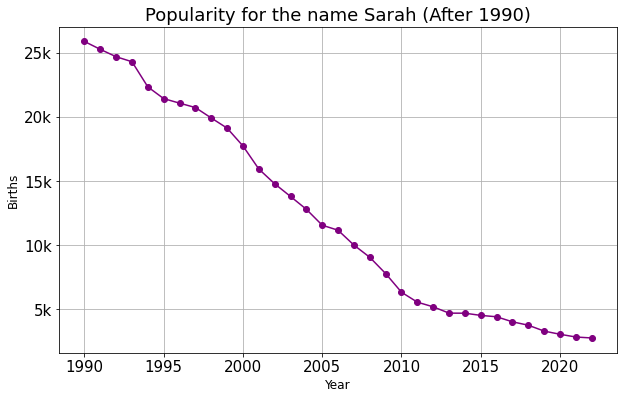

In [25]:
plot_name_births_over_years(df, "Sarah")

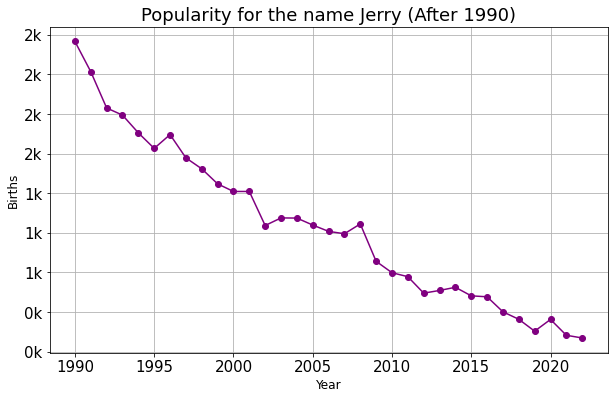

In [26]:
plot_name_births_over_years(df, "Jerry")

# Top Baby Names of 2022

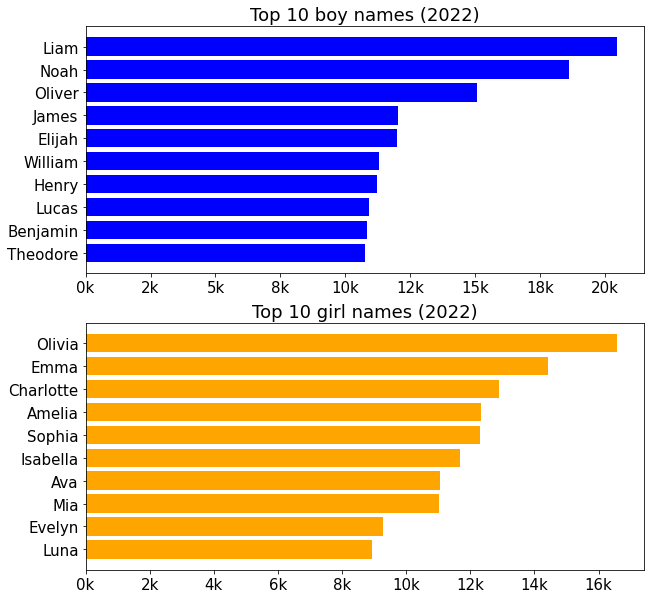

In [27]:
process_and_plot_names(df, 2022, "2022")

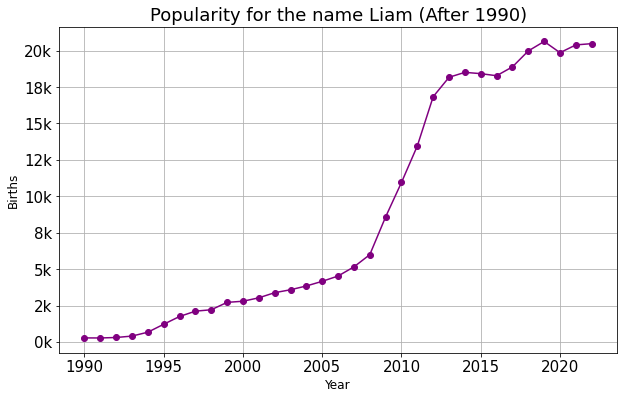

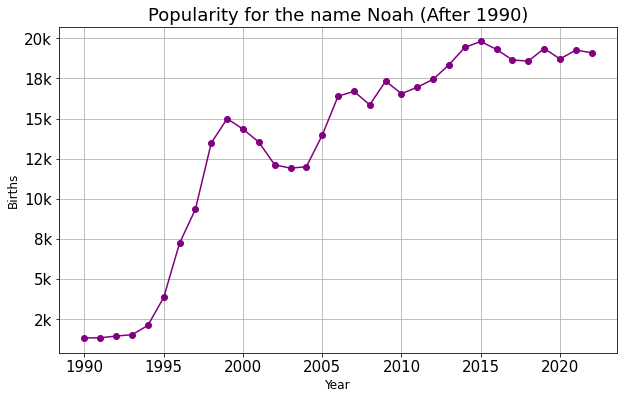

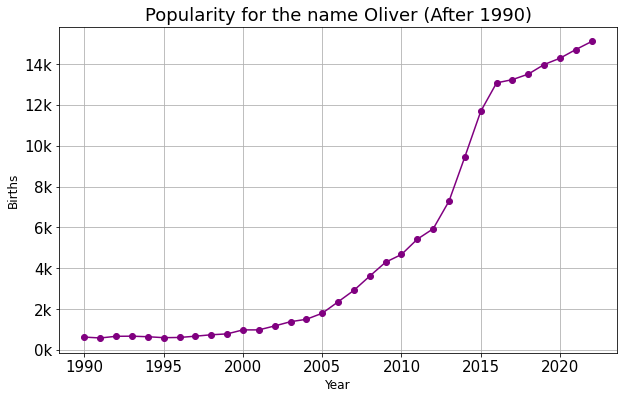

In [28]:
# The trends of the top 3 boy names of 2022.
plot_name_births_over_years(df, "Liam")
plot_name_births_over_years(df, "Noah")
plot_name_births_over_years(df, "Oliver")

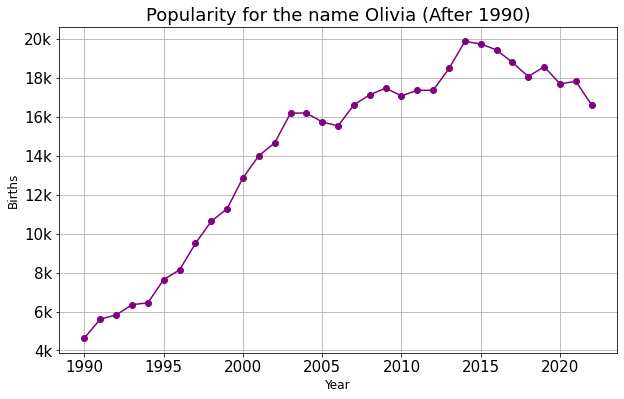

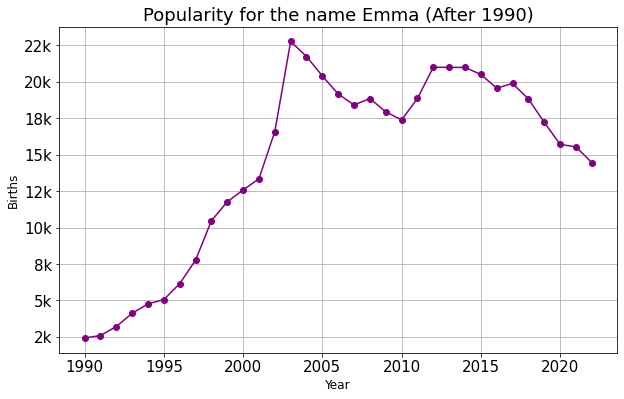

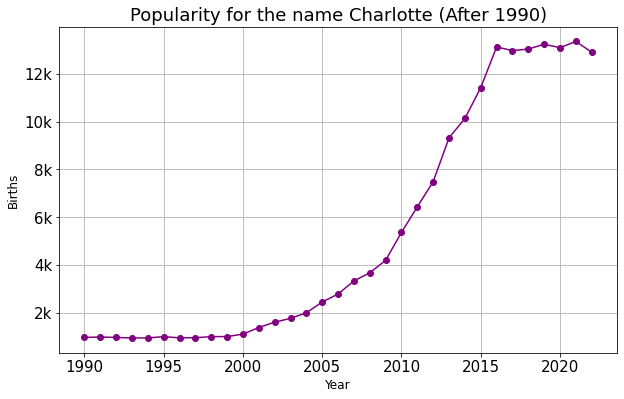

In [29]:
# The trends of the top 3 girl names of 2022.
plot_name_births_over_years(df, "Olivia")
plot_name_births_over_years(df, "Emma")
plot_name_births_over_years(df, "Charlotte")

# Determining Whether Sports Stars Will Affect Baby Naming

In [67]:
# Create a function to retrieve data for the chosen athlete's name after their birth year 
# Generate a line chart and annotate key events 
def influence_of_sports_star(df, born_year, name):
        df_year = df[df['year'] >= born_year].copy()
        name_data = df_year[df_year['name'] == name]
        name_group = name_data.groupby(['name', 'year'])['births'].sum().reset_index()
        years = name_group['year']
        births = name_group['births']
        plt.figure(figsize=(10, 6))
        plt.plot(years, births, marker='*', linestyle='-', color='gold')
        plt.title(f"Popularity for the name {name} (After {born_year})", fontsize = 18)
        plt.xlabel("Year", fontsize = 12)
        plt.ylabel("Births", fontsize = 12)
        plt.yticks(fontsize=15)
        plt.xticks(fontsize=15)
        plt.grid(True)

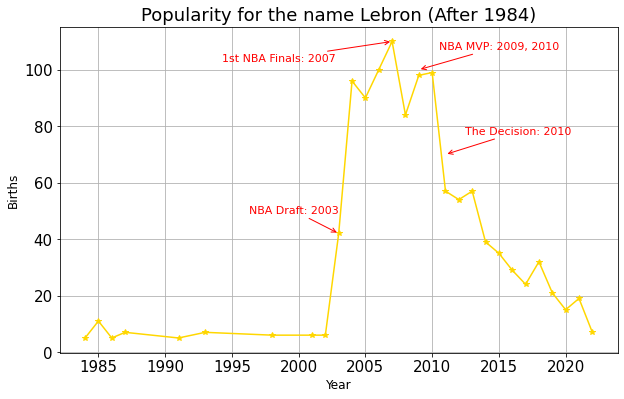

In [131]:
# Lebron James
influence_of_sports_star(df, 1984, 'Lebron')
plt.annotate('NBA Draft: 2003', xy=(2003, 42), xytext=(-90, 20), textcoords='offset points', color = 'red', arrowprops=dict(color='red', arrowstyle='->'), fontsize=11)
plt.annotate('1st NBA Finals: 2007', xy=(2007, 110),xytext=(-170, -20), textcoords='offset points', color = 'red', arrowprops=dict(color='red', arrowstyle='->'), fontsize=11)
plt.annotate('NBA MVP: 2009, 2010', xy=(2009, 100), xytext=(20, 20), textcoords='offset points', color = 'red', arrowprops=dict(color='red', arrowstyle='->'), fontsize=11)
plt.annotate('The Decision: 2010', xy=(2011, 70), xytext=(20, 20), textcoords='offset points', color = 'red', arrowprops=dict(color='red', arrowstyle='->'), fontsize=11)
plt.show()

Text(-130, -60, '2020 Helicopter crash')

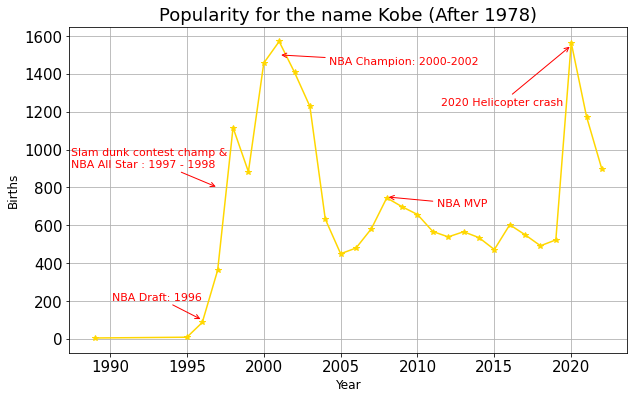

In [178]:
# Kobe Bryant
influence_of_sports_star(df, 1978, 'Kobe')
plt.annotate('NBA Draft: 1996', xy=(1996, 100), xytext=(-90, 20), textcoords='offset points', color = 'red', arrowprops=dict(color='red', arrowstyle='->'), fontsize=11)
plt.annotate('Slam dunk contest champ &\nNBA All Star : 1997 - 1998', xy=(1997, 800), xytext=(-147, 20), textcoords='offset points', color = 'red', arrowprops=dict(color='red', arrowstyle='->'), fontsize=11)
plt.annotate('NBA Champion: 2000-2002', xy=(2001, 1500), xytext=(50, -10), textcoords='offset points', color = 'red', arrowprops=dict(color='red', arrowstyle='->'), fontsize=11)
plt.annotate('NBA MVP', xy=(2008, 750), xytext=(50, -10), textcoords='offset points', color = 'red', arrowprops=dict(color='red', arrowstyle='->'), fontsize=11)
plt.annotate('2020 Helicopter crash', xy=(2020, 1550), xytext=(-130, -60), textcoords='offset points', color = 'red', arrowprops=dict(color='red', arrowstyle='->'), fontsize=11)

Text(-130, -40, '2020 Helicopter crash')

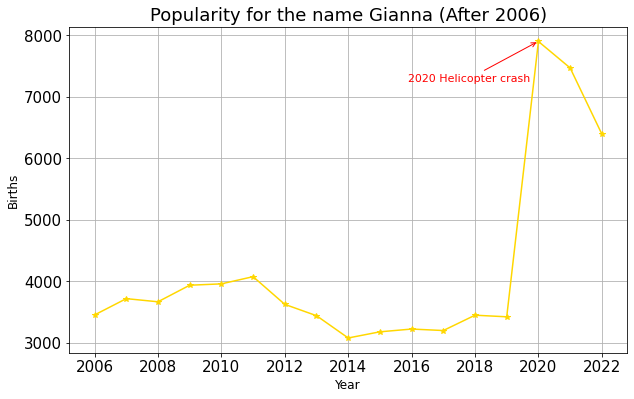

In [181]:
# Gianna Bryant
influence_of_sports_star(df, 2006, 'Gianna')
plt.annotate('2020 Helicopter crash', xy=(2020, 7900), xytext=(-130, -40), textcoords='offset points', color = 'red', arrowprops=dict(color='red', arrowstyle='->'), fontsize=11)

Text(-100, 40, 'NBA all star : 2020')

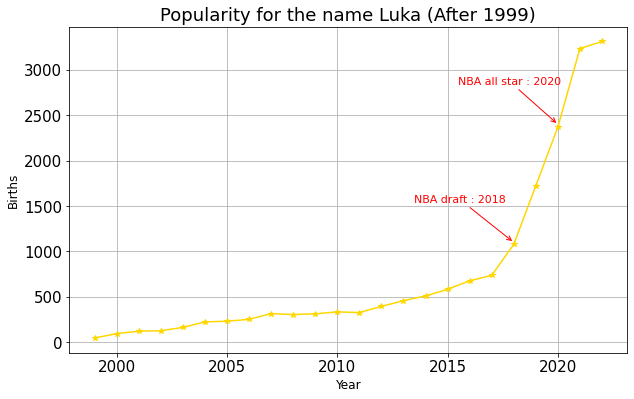

In [189]:
# Luka Doncic
influence_of_sports_star(df, 1999, 'Luka')
plt.annotate('NBA draft : 2018', xy=(2018, 1100), xytext=(-100, 40), textcoords='offset points', color = 'red', arrowprops=dict(color='red', arrowstyle='->'), fontsize=11)
plt.annotate('NBA all star : 2020', xy=(2020, 2400), xytext=(-100, 40), textcoords='offset points', color = 'red', arrowprops=dict(color='red', arrowstyle='->'), fontsize=11)

# Top Rising Names

In [41]:
# Filter data from recent 5 year
df_after_2018 = df[df['year'] >= 2018].copy()
name_counts_after_2018 = df_after_2018.groupby(['name', 'gender'])['births'].sum().reset_index()
# Filter data for year 2018
df_2018 = df[df['year'] == 2018].copy()
name_counts_2018 = df_2018.groupby(['name', 'gender'])['births'].sum().reset_index()
# Calculate percentage increase in births for each name after 2018
merged_data = pd.merge(name_counts_after_2018, name_counts_2018, on=['name', 'gender'], suffixes=('_after', '_2018'))
merged_data['percentage_increase'] = ((merged_data['births_after'] - merged_data['births_2018']) / merged_data['births_2018']) * 100
# Retain only births exceeding 30000 after 2018
merged_data_filtered = merged_data[merged_data['births_after'] >= 30000]
# Getting top 5 fastest-rising boy and girl names in 5 year
top_male_names = merged_data_filtered[merged_data_filtered['gender'] == 'M'].nlargest(5, 'percentage_increase')
top_female_names = merged_data_filtered[merged_data_filtered['gender'] == 'F'].nlargest(5, 'percentage_increase')

# Create a function to generate horizontal bar chart 
def plot_rising_names(names_df, title, color):
    fig, ax = plt.subplots(figsize=(10, 6))
    ax.barh(names_df['name'], names_df['percentage_increase'], color=color)
    ax.set_title(title, fontsize= 16)
    ax.set_xlabel('Percentage Increase', fontsize= 12)
    ax.set_ylabel('Name', fontsize= 12)
    ax.invert_yaxis()
    ax.tick_params(axis='both', which='major', labelsize=15)
    def percent_format(x, pos):
        return f"{x:.0f}%"
    ax.xaxis.set_major_formatter(ticker.FuncFormatter(percent_format))
    plt.tight_layout()
    plt.show()

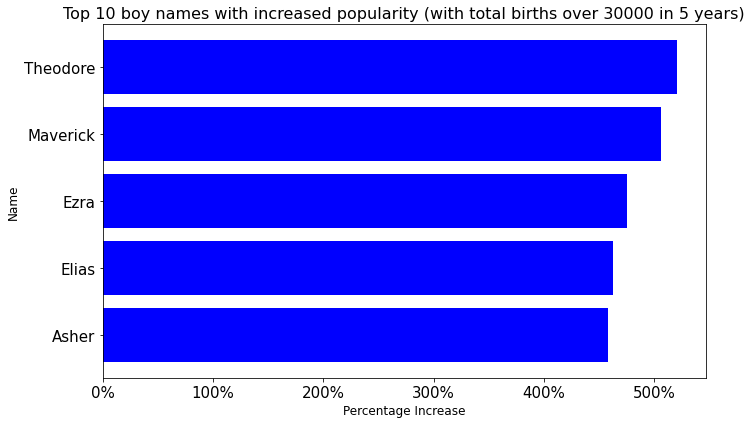

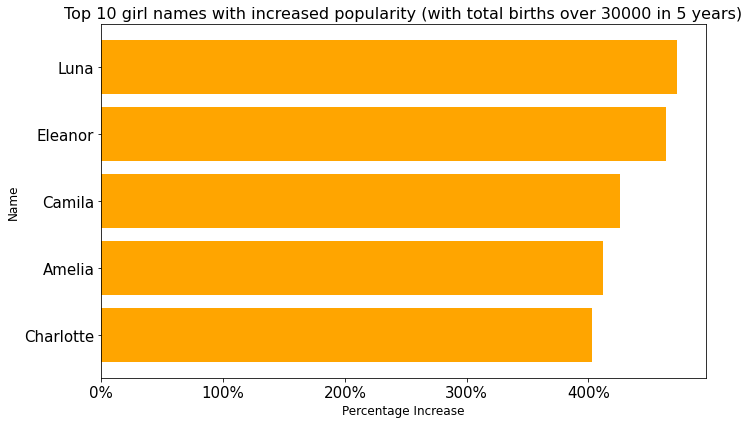

In [42]:
plot_rising_names(top_male_names, 'Top 5 boy names with increased popularity (with total births over 30000 in 5 years)', 'blue')
plot_rising_names(top_female_names, 'Top 5 girl names with increased popularity (with total births over 30000 in 5 years)', 'orange')

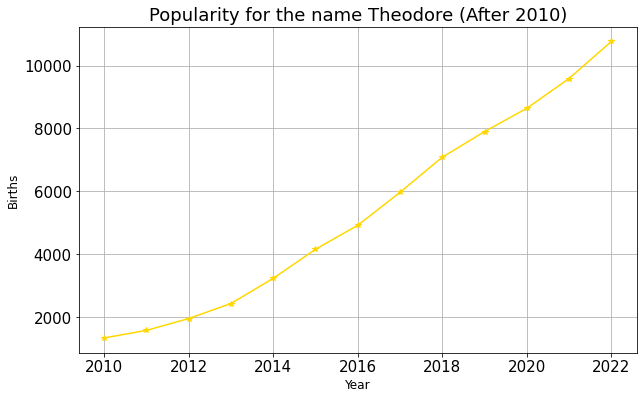

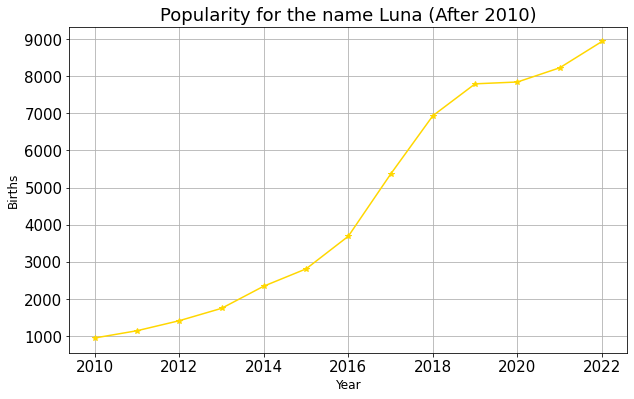

In [43]:
# Using a function to generate a line chart for top name.
influence_of_sports_star(df, 2010, 'Theodore')
influence_of_sports_star(df, 2010, 'Luna')

# Change of Unique Names

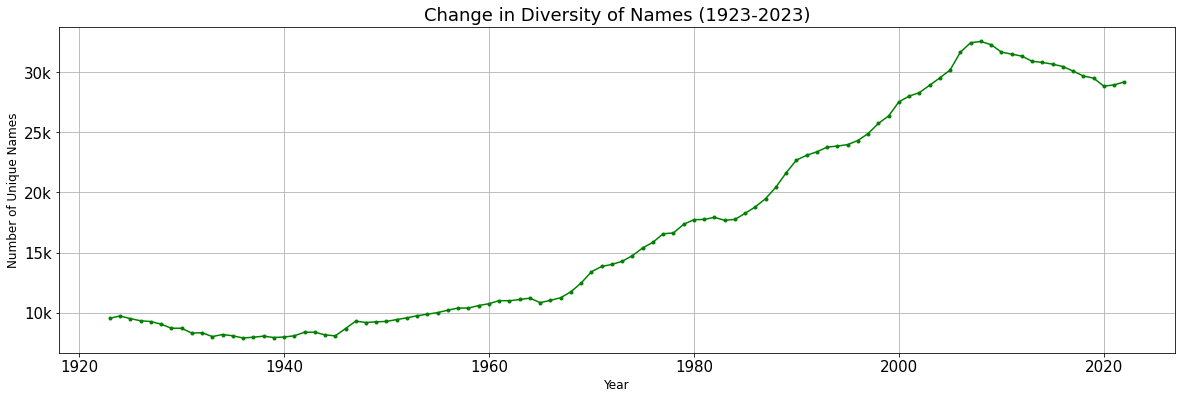

In [44]:
# found the number of unique names per year
unique_names_per_year = df.groupby("year")["name"].nunique()
plt.figure(figsize=(20, 6))
plt.plot(unique_names_per_year.index, unique_names_per_year.values, marker='.', color='green')
plt.title("Change in Diversity of Names (1923-2023)", fontsize= 18)
plt.xlabel("Year", fontsize= 12)
plt.ylabel("Number of Unique Names", fontsize= 12)
plt.yticks(fontsize=15)
plt.xticks(fontsize=15)
plt.grid(True)
formatter = ticker.FuncFormatter(lambda x, pos: f'{x/1000:.0f}k')
plt.gca().yaxis.set_major_formatter(formatter)
plt.show()